dataset loading

In [16]:
import sklearn.datasets
dl=dir(sklearn.datasets)
print(dl)
print(len(dl))

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__getattr__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_arff_parser', '_base', '_california_housing', '_covtype', '_kddcup99', '_lfw', '_olivetti_faces', '_openml', '_rcv1', '_samples_generator', '_species_distributions', '_svmlight_format_fast', '_svmlight_format_io', '_twenty_newsgroups', 'clear_data_home', 'data', 'descr', 'dump_svmlight_file', 'fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_file', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'get_data_home', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine', 'make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classificat

In [17]:
import pandas as pd
from sklearn.datasets import load_iris
a=load_iris()
x=a.data
y=a.target

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.4)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


In [18]:
df=pd.DataFrame(data=a.data,columns=a.feature_names)


In [19]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
f_n = a.feature_names
t_n = a.target_names
print('feature name',f_n)
print('target name',t_n)



feature name ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target name ['setosa' 'versicolor' 'virginica']


splitting dataset

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(105, 4)
(45, 4)
(105,)
(45,)


In [22]:
#scaling features
from sklearn.preprocessing import StandardScaler
s=StandardScaler()

In [23]:
x_train_scaled=s.fit_transform(x_train)
x_test_scaled=s.fit_transform(x_test)
print('first 5',x_train_scaled[:5])

first 5 [[ 2.26050169 -1.05089682  1.77622921  1.42370971]
 [-0.11897377  1.82764665 -1.14491883 -1.14263397]
 [-0.95179019  1.3478894  -1.3134466  -1.27095115]
 [-1.18973773 -0.09138233 -1.3134466  -1.14263397]
 [-0.71384264 -0.8110182   0.0909515   0.26885505]]


In [24]:
#encoding variables
from sklearn.preprocessing import LabelEncoder

In [25]:
l=['apple','mango','kiwi','orange']
e=LabelEncoder()

In [26]:
#encode the label
e_l=e.fit_transform(l)
print('oringnal label',l)
print('encoded label',e_l)

oringnal label ['apple', 'mango', 'kiwi', 'orange']
encoded label [0 2 1 3]


Standardscaler & minmaxscaler

In [90]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler


In [91]:
data=([[1,4,3,7],[3,6,4,8],[9,8,5,3]])

In [94]:
s=StandardScaler()
standardized=s.fit_transform(data)

In [95]:
m_s=MinMaxScaler()
minmax=m_s.fit_transform(data)

In [96]:
print('standardization:',standardized)
print('scaled data:',minmax)

standardization: [[-0.98058068 -1.22474487 -1.22474487  0.46291005]
 [-0.39223227  0.          0.          0.9258201 ]
 [ 1.37281295  1.22474487  1.22474487 -1.38873015]]
scaled data: [[0.   0.   0.   0.8 ]
 [0.25 0.5  0.5  1.  ]
 [1.   1.   1.   0.  ]]


encoding

In [97]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [98]:
data=(['cat'],['rat'],['dog'])

In [103]:
ohe= OneHotEncoder(sparse_output=False)
encoded = ohe.fit_transform(data)

In [104]:
print('encoded data',encoded)

encoded data [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


logistic regression


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_diabetes

In [30]:
d=load_diabetes()
X,y = d.data,d.target

In [31]:
y_binary = (y > np.median(y)).astype(int)


In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y_binary,random_state=15,test_size=0.5)

In [33]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [34]:
m = LogisticRegression()
m.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = m.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy",(accuracy * 100))

Accuracy 74.2081447963801


In [36]:
print("Confusion matrix", confusion_matrix(y_test, y_pred))
print("\nClassification report", classification_report(y_test, y_pred))

Confusion matrix [[81 32]
 [25 83]]

Classification report               precision    recall  f1-score   support

           0       0.76      0.72      0.74       113
           1       0.72      0.77      0.74       108

    accuracy                           0.74       221
   macro avg       0.74      0.74      0.74       221
weighted avg       0.74      0.74      0.74       221



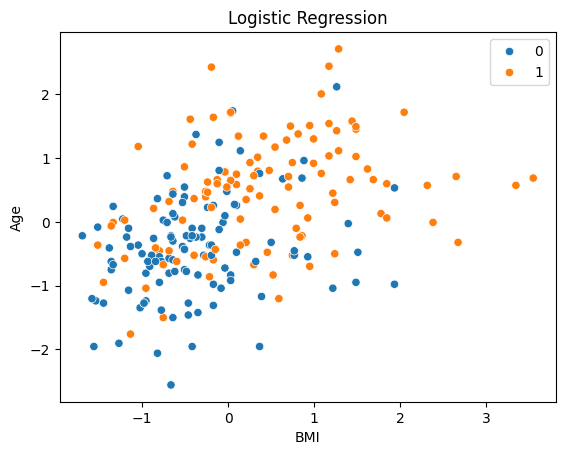

In [38]:
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 8], hue=y_test,color='blue')
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("Logistic Regression")
plt.show()                #0-no diabetes,1=diabetes

linear regression

In [39]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [40]:
b=load_diabetes()
x=b.data
y=b.target
df=pd.DataFrame(data=b.data,columns=b.feature_names)

In [41]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [42]:
d=load_diabetes()
X=d.data
y=d.target

X =X[:, 2]

X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

In [43]:
#spllitdata
X_train,X_test,y_train,y_test=train_test_split(X.reshape(-1,1),y,random_state=50,test_size=0.5)

In [44]:
l_r=LinearRegression()
l_r.fit(X_train,y_train)

LinearRegression()

MSE 3663.5981417665516
R2 0.4034545385593892


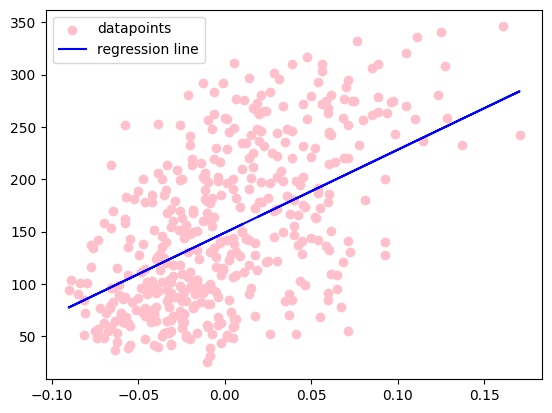

In [45]:
y_p=l_r.predict(X_test)
print('MSE',mean_squared_error(y_test,y_p ))
print('R2',r2_score(y_test,y_p))

plt.scatter(X,y,color='pink',label='datapoints')
plt.plot(X_train[:,0],l_r.predict(X_train),color='blue',label='regression line')
plt.legend()
plt.show()

decision tree

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
dt_re=DecisionTreeRegressor(max_depth=4,random_state=34)
dt_re.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=34)

In [48]:
y_p=dt_re.predict(X_test)
print('dicision tree Mse',mean_squared_error(y_test,y_p))

dicision tree Mse 4286.2812556574945


randomforestregress

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rf_reg=RandomForestRegressor(n_estimators=50,random_state=23)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=23)

In [51]:
y_p=rf_reg.predict(X_test)
print('random forest regresson MSE',mean_squared_error(y_test,y_p))



random forest regresson MSE 4999.749473081255


support vector regresson(svr)

In [52]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [53]:
svr = SVR(kernel='linear',C=1.0)
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [54]:
y_p= svr.predict(X_test)
print('SVR MSE',mean_squared_error(y_test,y_p))

SVR MSE 6847.775040394431


knn

In [55]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [56]:
from sklearn.metrics import(precision_score,recall_score,confusion_matrix,f1_score,classification_report,)

In [57]:
d=load_iris()
X=d.data
y=d.target

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=23,test_size=0.5)

In [59]:
kn=KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train,y_train)


KNeighborsClassifier()

In [60]:
y_p=kn.predict(X_test)
print('accuracy',accuracy_score(y_test,y_p))
print('precision',precision_score(y_test,y_p,average='weighted'))
print('recall',recall_score(y_test,y_p,average='weighted'))
print('confusion matrix',confusion_matrix(y_test,y_p))
print('classification report',classification_report(y_test,y_p))
print('f1 score',f1_score(y_test,y_p,average='weighted'))



accuracy 0.96
precision 0.9604195804195804
recall 0.96
confusion matrix [[27  0  0]
 [ 0 21  2]
 [ 0  1 24]]
classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.95      0.91      0.93        23
           2       0.92      0.96      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

f1 score 0.9599477124183007


nn:MLPclassifier

In [61]:
from sklearn.neural_network import MLPClassifier
nn=MLPClassifier(hidden_layer_sizes=(8,8),max_iter=100,random_state=23)
nn.fit(X_train,y_train)
y_p=nn.predict(X_test)

print('accuracy',accuracy_score(y_test,y_p))
print('classification report',classification_report(y_test,y_p))



accuracy 0.7333333333333333
classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.53      1.00      0.70        23
           2       1.00      0.20      0.33        25

    accuracy                           0.73        75
   macro avg       0.84      0.73      0.68        75
weighted avg       0.86      0.73      0.68        75



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


confusion matrix heatmap

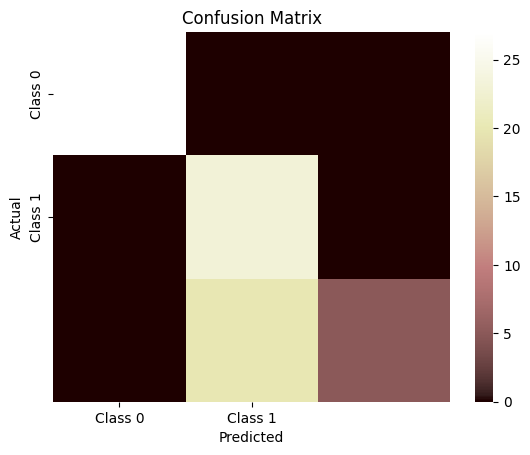

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, cmap='pink', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_p)

feature scaling

In [63]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_train_scaled=s.fit_transform(X_train)
X_test_scaled=s.transform(X_test)

In [64]:
#cross validation
from sklearn.model_selection import cross_val_score
cv=cross_val_score(rf_reg,X,y,cv=8)
print('cross validatin score',cv)
print('cv mean',cv.mean())

cross validatin score [1.         1.         0.9889619  0.         0.         0.81629714
 0.         0.        ]
cv mean 0.47565738095238097


unsupervied

k-means

kmeans clustering [[ 0.01974024  0.02409378  0.02650967  0.02353573 -0.00809304 -0.00384676
  -0.03205539  0.01967392  0.02215842  0.02467663]
 [ 0.00678509 -0.01955696 -0.01511209 -0.00289198  0.00304169 -0.00584766
   0.04739674 -0.03425601 -0.02469428 -0.012632  ]
 [-0.04780768 -0.01935219 -0.03784744 -0.04162187 -0.04795823 -0.04330453
   0.01013317 -0.03707222 -0.04111087 -0.04101944]
 [ 0.01216672  0.00703883  0.01849282  0.01143225  0.06678108  0.06597531
  -0.02029081  0.05597826  0.04321356  0.02207818]]


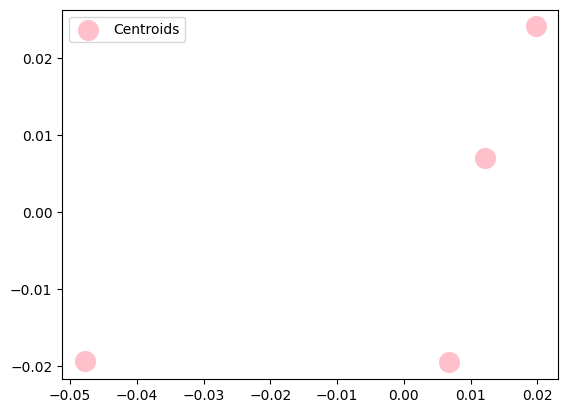

In [65]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4,random_state=34)
km.fit(x)
print('kmeans clustering',km.cluster_centers_)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='pink', marker='o', s=200, label='Centroids')
plt.legend()
plt.show()

dbscan

In [66]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.4,min_samples=10)
db.fit(X_train,y_train)


DBSCAN(eps=0.4, min_samples=10)

label [ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1 -1  1  2 -1 -1  1 -1 -1  2 -1 -1 -1  1  2  2 -1 -1 -1 -1
 -1 -1 -1  1  1  1 -1 -1 -1 -1  2 -1 -1 -1  1 -1  2  2  2 -1  2 -1  2  2
  2 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]


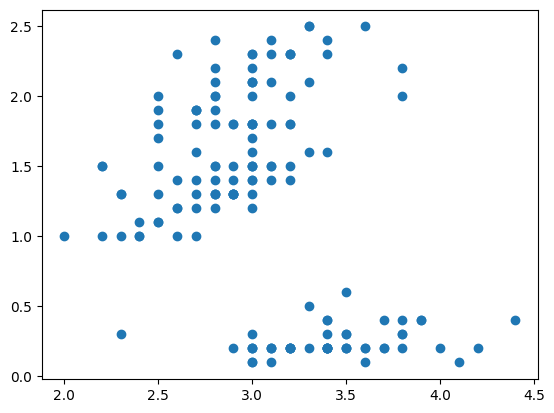

In [67]:
l=db.fit_predict(X)             #-1 indicates noise
print('label',l)
plt.scatter(X[:,1],X[:,-1])
plt.show()

hirarchical/aggolomerative clustering

label [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


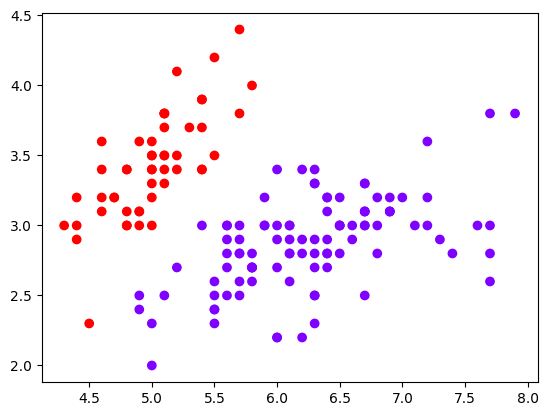

In [68]:
from sklearn.cluster import AgglomerativeClustering
ag=AgglomerativeClustering(n_clusters=2)
l=ag.fit_predict(X)
print('label',l)
plt.scatter(X[:,0],X[:,1],c=l,cmap='rainbow')
plt.show()


PCA

In [69]:
from sklearn.decomposition import PCA
p=PCA(n_components=3)
a=p.fit_transform(X)


In [70]:
print('PCA',p.explained_variance_ratio_)


PCA [0.92461872 0.05306648 0.01710261]


Ridge regression-l2

In [71]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=1.0)
r.fit(X_train,y_train)


Ridge()

In [72]:
y_p=r.predict(X_test)
print('ridge regression coefficient',r.coef_)

ridge regression coefficient [-0.04902329 -0.07460078  0.23523598  0.51423416]


lasso

In [73]:
from sklearn.linear_model import Lasso
l=Lasso(alpha=0.1)
l.fit(X_train,y_train)



Lasso(alpha=0.1)

In [74]:
y_p=l.predict(X_test)
print('lasso regression coefficient',l.coef_)

lasso regression coefficient [ 0.         -0.          0.40127077  0.        ]


gradientboosting

In [75]:
from sklearn.ensemble import  GradientBoostingRegressor
g=GradientBoostingRegressor(n_estimators=100,learning_rate=0.3,max_depth=5,random_state=34)
g.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.3, max_depth=5, random_state=34)

In [82]:
y_p=g.predict(X_test)

print('gradient boosting algorithm',y[:4])


gradient boosting algorithm [0 0 0 0]


naive bayes

In [83]:
from sklearn.naive_bayes import GaussianNB
n=GaussianNB()
n.fit(X_train,y_train)

GaussianNB()

In [84]:
y_p=n.predict(X_test)
print('accuracy',accuracy_score(y_test,y_p))

accuracy 0.9466666666666667


Text(0.5, 1.0, 'Naive Bayes Classification')

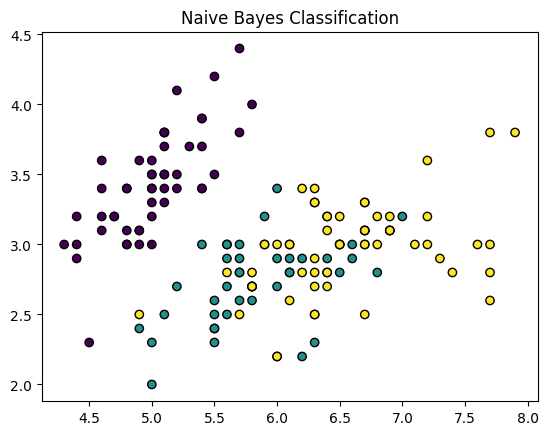

In [87]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Naive Bayes Classification')


dendrogram

In [88]:
from scipy.cluster.hierarchy import dendrogram,linkage

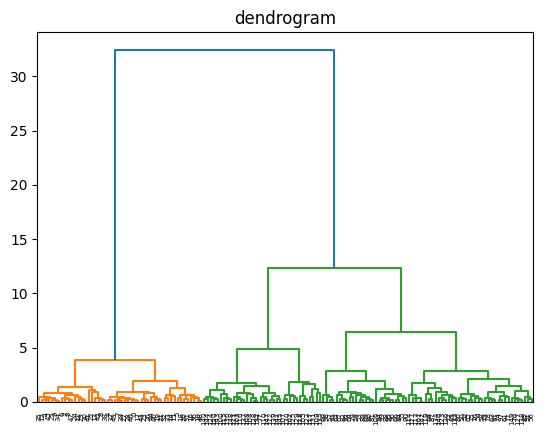

In [89]:
z=linkage(X,method='ward')
dendrogram(z)
plt.title('dendrogram')
plt.show()